In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2

Média diagonal principal: 43.4
Média diagonal secundária: 42.8
Média linhas: [60.8 46.1 56.5 32.9 54.6 55.3 33.8 38.6 59.4 45.7]
Média colunas: [70.9 61.5 41.1 43.  52.5 42.8 34.5 54.7 45.7 37. ]


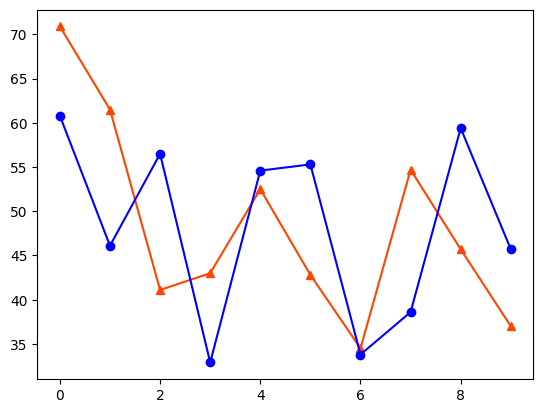

In [201]:
vetor = np.array([[ 44,  70,  98,  63,  30,  96,  26,  94,  20,  67],
    [ 22,  79,  53,  16,  46,  63,  45,  61,  66,  10],
    [ 71,  96,  68,  14,  86,  99,   1,  44,  66,  20],
    [ 92,  40,   0,  12,  91,   1,   9,  19,  60,   5],
    [ 53,  46,  65,  73,  29,   0,  89, 100,  13,  78],
    [ 81,  16,  21, 100,  36,  51,  38,  85,  90,  35],
    [ 91,  70,   8,  20,  60,  40,  14,  16,   0,  19],
    [ 87,  10,  24,  40,  62,   5,  32,  28,  69,  29],
    [ 94,  88,  40,   4,  85,  61,  30,  68,  63,  61],
    [ 74, 100,  34,  88,   0,  12,  61,  32,  10,  46]])

# Média da diagonal principal
media_diagonal_princpal = np.mean(np.diagonal(vetor))
print('Média diagonal principal:', media_diagonal_princpal)

# Média da diagonal secundária
media_dagonal_secundaria = np.mean(np.diagonal(np.flip(vetor, axis=1)))
print('Média diagonal secundária:', media_dagonal_secundaria)

# Média das linhas
media_linhas = np.mean(vetor, axis=1)
print('Média linhas:', media_linhas)

# Média das colunas
media_colunas = np.mean(vetor, axis=0)
print('Média colunas:', media_colunas)


# Gŕafico
plt.plot(media_colunas, color='orangered', marker='^', label='linhas')
plt.plot(media_linhas, color='b', marker='o', label='colunas')

# 3

In [202]:
# Cria os DataFrames
df1 = pd.read_csv('CAR_INFO.csv', sep=',')
df2 = pd.read_csv('CAR_VALUES.csv', sep=',')

# Une os DataFrames e cria um .csv
df = df1.assign(year=df2['year'], selling_price=df2['selling_price'], km_driven=df2['km_driven'])
df.to_csv('cars.csv')

# Informações do DataFrame final
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4340 non-null   int64 
 1   name           4340 non-null   object
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   year           4340 non-null   int64 
 7   selling_price  4340 non-null   object
 8   km_driven      4340 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


# 4

In [203]:
# Cria uma série para a coluna 'marca' e outra para a coluna 'selling_price' com os valores corrigidos
marca = pd.Series(list(map(lambda x: x.split(' ')[0], list(df['name']))))
selling_price = pd.Series(list(map(lambda x: int(x.split(' ')[1]), list(df2['selling_price']))))

# Cria um novo DataFrame com os valores corrigidos
df = df1.assign(year=df2['year'], selling_price=selling_price, km_driven=df2['km_driven'], marca=marca)



indices = []
valor_medio = {}
valor_total = {}
# Loop que percorre os valores únicos da coluna 'marca'
for marca in set(df['marca']):

    # Lista de valores que será usada para criar uma série e fazer a média
    lista = []

    # Loop que percorre as linhas do DataFrame
    for idx, row in df.iterrows():
        # Se a marca (que está no nome) for igual a marca, da append na lista de valores com o valor do carro 
        if row[1].split(' ')[0] == marca:
            lista.append(row[7])
        # Adiciona o índice de todas as linhas com 0 na coluna 'selling_price' a uma lista (motivo: fazer um for com menos iterações)
        if row[7] == 0:
            indices.append(idx)
            
    # Atualiza o dicionário com os valores médios e totais de cada marca
    valor_medio.update({marca: int(pd.Series(lista).mean())})
    valor_total.update({marca: pd.Series(lista).sum()})



# Muda os valores da coluna 'selling_price' == 0 para a média das marcas a partir da lista de indices
indices = list(set(indices))
for i in indices:
    df.loc[i, 'selling_price'] = valor_medio[df.loc[i, 'marca']]

# Cria um .csv com os dados corrigidos e mostra as infos do DataFrame
df.to_csv('cars.csv', index=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             4340 non-null   int64 
 1   name           4340 non-null   object
 2   fuel           4340 non-null   object
 3   seller_type    4340 non-null   object
 4   transmission   4340 non-null   object
 5   owner          4340 non-null   object
 6   year           4340 non-null   int64 
 7   selling_price  4340 non-null   int64 
 8   km_driven      4340 non-null   int64 
 9   marca          4340 non-null   object
dtypes: int64(4), object(6)
memory usage: 339.2+ KB


# 5

In [204]:


# # Cria um dicionário com a quantidade de vezes que cada item aparece no DataFrame
# owners = dict(df['owner'].value_counts())


In [205]:
# Lê o arquivo
df_copia = pd.read_csv('cars.csv')



# Organiza o dicionário de valores médios por ordem de maior ao menor
valor_medio = dict(sorted(valor_medio.items(), key=lambda x: x[1], reverse=True))
valor_total = dict(sorted(valor_total.items(), key=lambda x: x[1], reverse=True))



# Itera sobre as chaves do dicionário de valores médios e também sobre o dataset para separar os dados de first e second owner
aux = {}
for marca in valor_medio.keys():
    
    # Listas que serão usadas para calcular o valor total pelo tipo de dono
    first_owner = []
    second_owner = []
    # Quantidades para fazer a divisão
    qtd_first = 0
    qtd_second = 0

    for idx, row in df_copia.iterrows():
        if row[9] == marca:
            # Separa os valores de First Owner
            if row[5] == 'First Owner':
                first_owner.append(row[7])
                qtd_first += 1
            # Separa os valores de Second Owner
            if row[5] == 'Second Owner':
                second_owner.append(row[7])
                qtd_second += 1
    
    # Separa os valores em tuplas e grava em um dicionário auxiliar evitando 'nan' na saída
    if len(first_owner) == 0 or len(second_owner) == 0:
        if len(first_owner) == 0:
            aux.update({marca: (0, pd.Series(second_owner, dtype=int).mean())})
        if len(second_owner) == 0:
            aux.update({marca: (pd.Series(first_owner, dtype=int).mean(), 0)})
    else:
        aux.update({marca: (pd.Series(first_owner, dtype=int).mean(), pd.Series(second_owner, dtype=int).mean())})



# Insere os dados do dicionário auxiliar no dicionário que será usado para plotar o gráfico
dados_grafico = {}
for i, nome in enumerate(aux.keys()):
    if i < 5:
        dados_grafico.update({nome: aux[nome]})

# Organiza o dicionário por ordem alfabética das chaves
dados_grafico = dict(sorted(dados_grafico.items()))



# Plotagem do gráfico de barras


In [206]:


dados_grafico


{'BMW': (3362500.0, 1011666.6666666666),
 'Jaguar': (1964999.0, 2090000.0),
 'Land': (3925000.0, 2349000.0),
 'Mercedes-Benz': (3090730.769230769, 1869333.3333333333),
 'Volvo': (2825000.0, 0)}

# 6